In [4]:
import pandas as pd
import statsmodels.api as sm # 
import numpy as np 
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
df = pd.read_csv("part-00000", sep = '\t', header = None, names = ['key', 'debtincome'])

In [6]:
df.loc[:,'state'] = df['key'].apply(lambda x: eval(x)[0])
df.loc[:,'msa'] = df['key'].apply(lambda x: eval(x)[1])
df.loc[:,'county'] = df['key'].apply(lambda x: eval(x)[2])
df.loc[:,'year'] = df['key'].apply(lambda x: eval(x)[3])

In [7]:
df = df[['key', 'state', 'msa', 'county', 'year', 'debtincome']]

In [8]:
def extractMSA(row):
    x = row['msa']
    toAdd = x.split(" - ")[0].split(", ")[0]
    return toAdd

In [9]:
def extractState(row):
    x = row['msa']
    toAdd = x.split(" - ")[1]
    return toAdd

In [10]:
df.loc[:,('stateFilter')] = df.apply(extractState, axis = 1)

In [11]:
def getSlope(msastring):
    debtincome = df[df['msa'] == msastring]['debtincome']
    
    x = np.arange(0, len(debtincome))
    y = np.array(debtincome)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    return slope

In [12]:
msa = pd.Series(df['msa'].ravel()).unique()

In [28]:
debtincomeMSA = {} 

for i in msa:
    debtincomeMSA[i] = round(getSlope(i), 3)

In [25]:
debtincomeMSA = sorted(debtincomeMSA.items(), key=lambda x: -x[1])

In [29]:
diArray = sorted(debtincomeMSA.items(), key=lambda x: x[0])

In [30]:
# for i in diArray:
#     x = i[0].split(" - ")[0]
#     print x.split(",")[0]

output = pd.DataFrame(diArray, columns = ['msa', 'slope'])

In [32]:
output.head()

,msa,slope
0,Abilene - TX,0.003
1,"Aguadilla, Isabela, San Sebastian - PR",0.003
2,Akron - OH,-0.005
3,Albany - GA,-0.002
4,"Albany, Schenectady, Troy - NY",-0.010


####ACS Data

In [33]:
acs = pd.read_csv("acs.csv")

In [34]:
acs = acs[['Geo_QName', 'Geo_STUSAB', 'SE_T057_001', 'SE_T101_001']]

In [35]:
acs.loc[:,('stateFilter')] = acs.apply(lambda row: row['Geo_STUSAB'].upper(), axis=1)
acs.loc[:,('msaFilter')] = acs.apply(lambda row: row['Geo_QName'].split(", ")[0].split("-")[0], axis = 1)

In [36]:
acs.head()

,Geo_QName,Geo_STUSAB,SE_T057_001,SE_T101_001,stateFilter,msaFilter
0,"Albertville, Alabama",al,39526,114000,AL,Albertville
1,"Anniston-Oxford-Jacksonville, Alabama",al,39962,100600,AL,Anniston
2,"Auburn-Opelika, Alabama",al,43542,146900,AL,Auburn
3,"Birmingham-Hoover, Alabama",al,48336,143400,AL,Birmingham
4,"Columbus, Alabama",al,36143,104400,AL,Columbus


In [37]:
output.loc[:,'msaFilter'] = output.apply(extractMSA, axis = 1)
output.loc[:,'stateFilter'] = output.apply(extractState, axis = 1)

In [38]:
output.head()

,msa,slope,msaFilter,stateFilter
0,Abilene - TX,0.003,Abilene,TX
1,"Aguadilla, Isabela, San Sebastian - PR",0.003,Aguadilla,PR
2,Akron - OH,-0.005,Akron,OH
3,Albany - GA,-0.002,Albany,GA
4,"Albany, Schenectady, Troy - NY",-0.010,Albany,NY


In [39]:
result = pd.merge(output, acs, how = 'left', on = ['stateFilter', 'msaFilter'])
result = result[['msa', 'slope', 'SE_T057_001', 'SE_T101_001']]

In [40]:
result.head()


,msa,slope,SE_T057_001,SE_T101_001
0,Abilene - TX,0.003,44446,89000
1,"Aguadilla, Isabela, San Sebastian - PR",0.003,15152,105800
2,Akron - OH,-0.005,50392,139100
3,Albany - GA,-0.002,35885,106300
4,"Albany, Schenectady, Troy - NY",-0.010,61291,197500


In [43]:
pd.set_option('display.mpl_style', 'default')

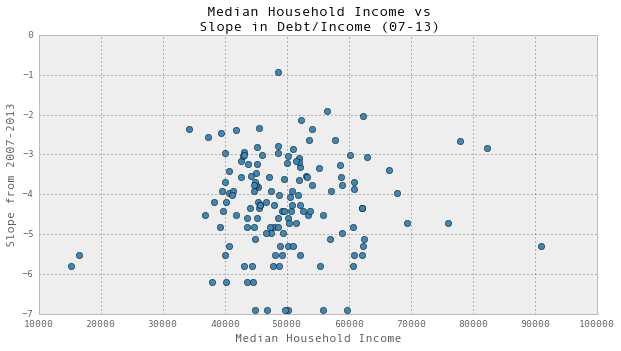

In [74]:
plt.figure(figsize=(10,5))
plt.plot(result['SE_T057_001'], np.log(result['slope']), 'o')
plt.title('Median Household Income vs \nSlope in Debt/Income (07-13)')
plt.xlabel("Median Household Income")
plt.ylabel("Slope from 2007-2013")

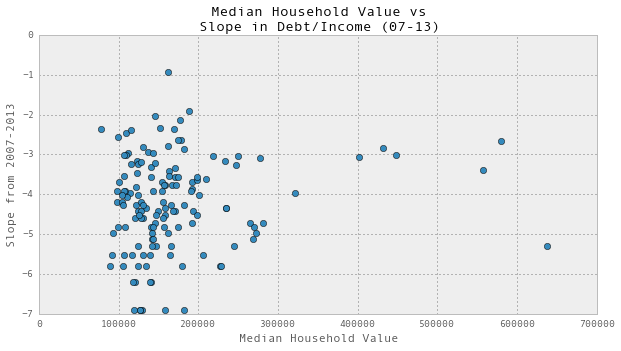

In [75]:
plt.figure(figsize=(10,5))
plt.plot(result['SE_T101_001'], np.log(result['slope']), 'o')
plt.title('Median Household Value vs \nSlope in Debt/Income (07-13)')
plt.xlabel("Median Household Value")
plt.ylabel("Slope from 2007-2013")